<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Using Monte Carlo to Estimate Pi

_Author: Matt Brems (DC) _

---

In this demo, we will estimate the value of $\pi$ using the Monte Carlo method. We will generate uniformly random points in the first quadrant. Then, we'll use an inequality to test whether each is "inside" the unit circle. Finally, we'll use the ratio of inside to total points to estimate $\pi$ based on $A_{circle} = \pi r^2$.

### Lesson Guide
1. [Generate uniformly random points in Quadrant I](#1.-Generate-uniformly-random-points-in-Quadrant-I)
2. [Test whether each point is "inside" or "outside" the unit circle](#2.-Test-whether-each-point-is-"inside"-or-"outside"-the-unit-circle)
3. [Estimate the area of the circle to estimate pi](#3.-Compute-the-area-of-the-circle-to-estimate-pi)


In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Generate uniformly random points in Quadrant I

In [2]:
NPOINTS = 1000000

# Note we are sampling from quadrant I, since 0 < x,y < 1.
x = np.random.uniform(low=0.0, high=1.0, size=NPOINTS)
y = np.random.uniform(low=0.0, high=1.0, size=NPOINTS)

In [3]:
# Given the above, what numbers would 
# you expect to be most likely to appear?
x[:10]

array([0.47805182, 0.91042862, 0.78750843, 0.36981865, 0.85414575,
       0.23134892, 0.88264974, 0.85612405, 0.60331767, 0.1598231 ])

(array([2., 0., 1., 0., 1., 1., 0., 0., 1., 4.]),
 array([0.1598231 , 0.23488365, 0.3099442 , 0.38500476, 0.46006531,
        0.53512586, 0.61018641, 0.68524696, 0.76030752, 0.83536807,
        0.91042862]),
 <a list of 10 Patch objects>)

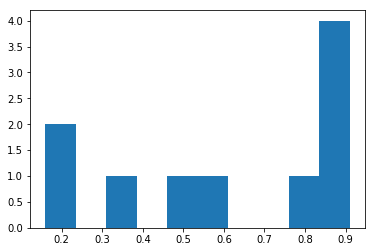

In [4]:
# Verify your intuition! How would you expect 
# the distribution to change as you increase N?
N = 10
plt.hist(x[:N])

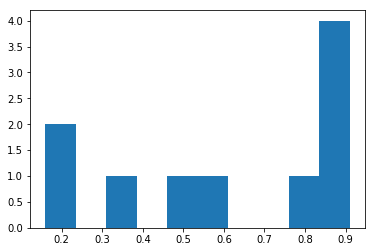

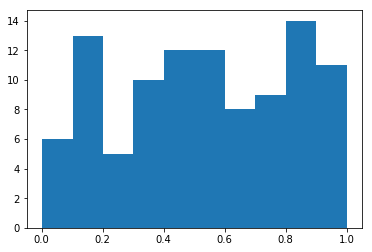

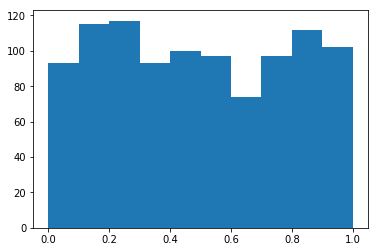

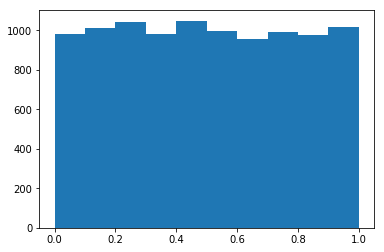

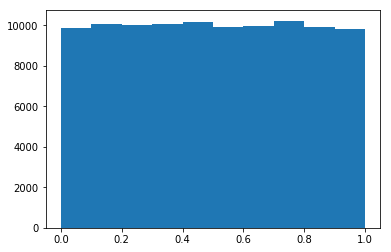

In [5]:
for n in [10,100,1000,10000,100000]:
    plt.hist(x[:n])
    plt.show()



## 2. Test whether each point is "inside" or "outside" the unit circle
---

Recall that all points "outside" a unit circle satisfy:
$$x^2 + y^2 > 1$$

Solving for y:
$$y > sqrt(1 - x^2)$$

So if this inequality holds, the point (x,y) must be outside the unit circle.

We will approximate the area of 1/4 of the unit circle by randomly sampling points in the first quadrant and applying this inequality to each.

In [6]:
results = []

for i in range(NPOINTS):
    if y[i] > math.sqrt(1 - x[i]**2):
        results.append("outside")
    else:
        results.append("inside")

In [7]:
# Remember that we can compute the above in a single line using NumPy:

xy_is_outside = y > np.sqrt(1 - x**2)
xy_is_outside

array([ True,  True,  True, ..., False,  True, False])

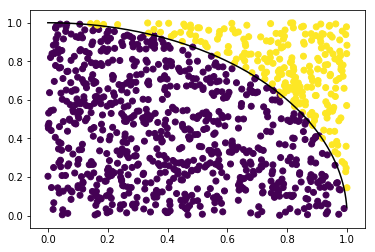

In [8]:
# It is always a good idea to verify! Let's scatter plot our two classes.

NSUBSET = 1000    # To speed plotting

# Our points
plt.scatter(x[:NSUBSET], y[:NSUBSET], c=xy_is_outside[:NSUBSET]);


# y = sqrt( 1 - x^2 )
x_all = np.arange(0,1,0.001)
plt.plot(x_all, np.sqrt(1. - x_all**2), c='k');



## 3. Compute the area of the circle to estimate pi
---

The "inside" area of a unit circle ($r = 1$) in the first quadrant is:

$$\frac{\pi r^2}{4} = \frac{\pi}{4}$$

The ratio of our "inside" to total points approximates this area:

$$\frac{\pi}{4} \approx \frac{N_{inside}}{N_{total}}$$

Hence:

$$\pi \approx 4 \frac{N_{inside}}{N_{total}}$$

In [9]:
print results.count("inside")
print results.count("outside")

784785
215215


In [10]:
pi_estimated = 4 * float(results.count("inside")) / len(x)
pi_estimated

3.13914

In [11]:
# What is our percent error?

error_pct = 100. * abs(math.pi - pi_estimated) / math.pi

"{:.5f}% error".format(error_pct)

'0.07807% error'